In [216]:
import pandas as pd

# Предобработка

## Обработка первого датасета

In [217]:
df_regr = pd.read_csv("../data/airbnb_ny.csv")
df_regr.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

Для упрощения задачи будем работать не со всеми районами, а только с Манхэттеном.

In [218]:
df_regr = df_regr[df_regr['neighbourhood_group'] == 'Manhattan']

In [219]:
df_regr.head()

id  ... availability_365
1  2595  ...              355
2  3647  ...              365
4  5022  ...                0
5  5099  ...              129
7  5178  ...              220

[5 rows x 16 columns]

In [220]:
# перекодируем признаки и избавимся от пропусков
df_regr.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [221]:
# rt - room type
df_regr = pd.get_dummies(df_regr, prefix = ['rt'], columns = ['room_type'])

In [222]:
df_regr.isnull().sum()

id                                   0
name                                 9
host_id                              0
host_name                            9
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5029
reviews_per_month                 5029
calculated_host_listings_count       0
availability_365                     0
rt_Entire home/apt                   0
rt_Private room                      0
rt_Shared room                       0
dtype: int64

In [223]:
# пропуски в reviews_per_month заполним 0
df_regr['reviews_per_month'] = df_regr['reviews_per_month'].fillna(0)

Найдем дату последнего отзыва и с помощью нее заполним пропущенные значения в столбце last_review.

In [224]:
df_regr_2 = df_regr['last_review'].fillna("")
df_regr_2.max()

'2019-07-08'

In [225]:
from datetime import datetime

In [226]:
# присвоим дату последнего отзыва пропущенным значениям
date_now = datetime(2019,7,8)
df_regr['last_review'] = df_regr['last_review'].fillna(date_now.strftime('%Y-%m-%d')) # конвертируем в строковое значение
df_regr['last_review'] = df_regr['last_review'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [227]:
# переменная days_from_last_review содержит в себе количество дней, прошедших со дня написания отзыва до дня
# написания последнего отзыва
df_regr['days_from_last_review'] = df_regr['last_review'].apply(lambda x: (date_now - x).days)

In [228]:
df_regr.isnull().sum()

id                                0
name                              9
host_id                           0
host_name                         9
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
rt_Entire home/apt                0
rt_Private room                   0
rt_Shared room                    0
days_from_last_review             0
dtype: int64

In [229]:
# удалим ненужные нам данные
df_regr = df_regr.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'latitude', 'longitude'], axis = 1)

In [230]:
df_regr.isnull().sum()

neighbourhood                     0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
rt_Entire home/apt                0
rt_Private room                   0
rt_Shared room                    0
days_from_last_review             0
dtype: int64

In [231]:
df_regr.to_csv("../data/airbnb_ny_preprocessed.csv")

## Обработка второго датасета

In [232]:
df_cl = pd.read_csv("../data/iris.csv")
df_cl

Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]

In [233]:
del df_cl['Id']

In [234]:
df_cl.isnull().sum() # как видно, пропущенных значений нет

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [235]:
from sklearn.preprocessing import LabelEncoder
df_cl['Species'] = LabelEncoder().fit_transform(df_cl.Species)
df_cl

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]

In [236]:
# сохраним обработанные данные в новый файл
df_cl.to_csv("../data/iris_preprocessed.csv")

# Визуализация

In [237]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams

## Датасет 1

In [238]:
df = pd.read_csv("../data/airbnb_ny.csv")
df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

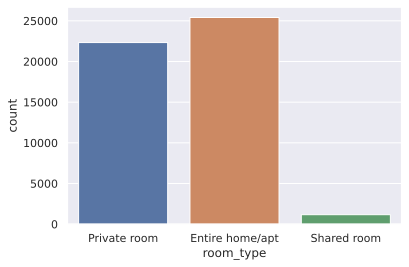

In [239]:
sns.set(style="darkgrid")
ax = sns.countplot(x='room_type', data = df)
plt.show()

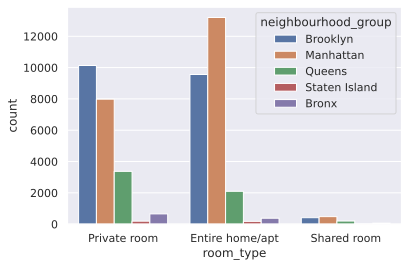

In [240]:
sns.set(style="darkgrid")
ax = sns.countplot(x='room_type', hue = "neighbourhood_group" , data = df)
plt.show()

Заметно, что тип комнаты Entire home/apt имеется в большом доступе в Манхэттене, тип Shared room доступен в малом количестве во всех городах. Так же стоит заметить, что в Staten Island снять жильё можно крайне редко(почти невозможно).

Далее рассмотрим зависимость между типом номера и ценой.

In [241]:
# произведем распределение цен на три категории: низкая, средняя, высокая и добавим соотв. столбец в датафрейм
def groupPrice(price):
    if price < 100:
        return "Low price"
    elif price >=100 and price < 200:
        return "Middle price"
    else:
        return "High price"

In [242]:
price_group = df['price'].apply(groupPrice)
df.insert(10, "price_group", price_group, True)
df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 17 columns]

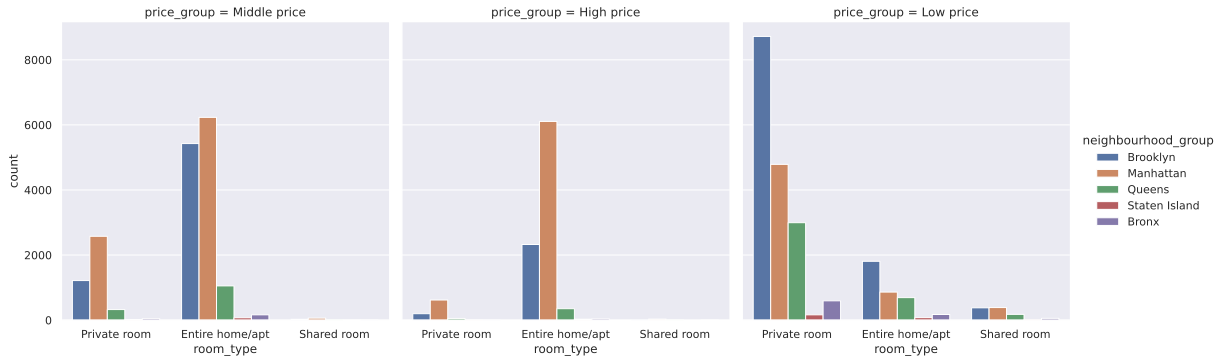

In [243]:
g = sns.catplot(x="room_type", hue="neighbourhood_group", col="price_group", data=df, kind="count", height=5, aspect=1)
plt.show()

Таким образом, с помощью полученных данных можно сделать вывод: выгоднее всего снимать жилье в Бруклине, там можно снять любой тип комнаты по низкой цене.

## Датасет 2

In [244]:
df = pd.read_csv("../data/iris.csv")
df

Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]

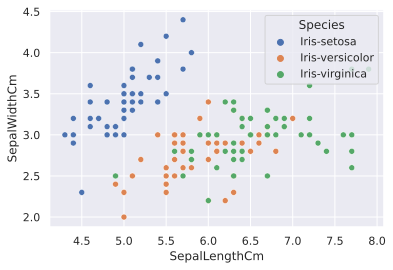

In [245]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)


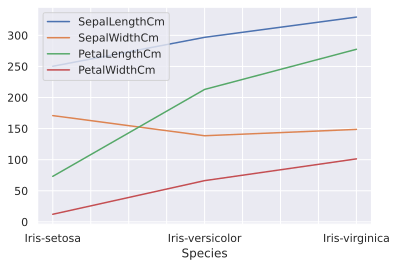

In [246]:
sales_df = df[[x for x in df.columns if 'Sepal' in x] + [x for x in df.columns if 'Petal' in x] + ['Species']]
sales_df.groupby('Species').sum().plot()

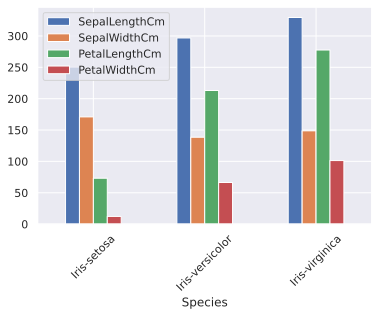

In [247]:
sales_df.groupby('Species').sum().plot(kind='bar', rot=45)

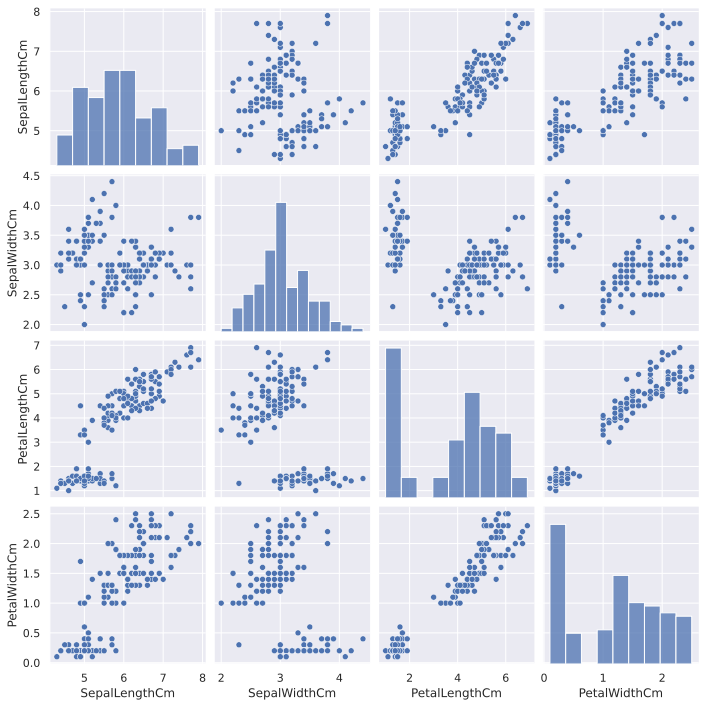

In [248]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
sns_plot = sns.pairplot(df[cols])

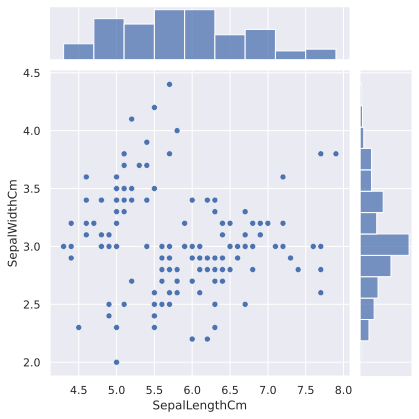

In [249]:
sns.jointplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = df)

По графику видно, что, в среднем, размер чашелистика всех трех видов ирисов имеет следующие параметры: ширина 3 см, длина 6 см.

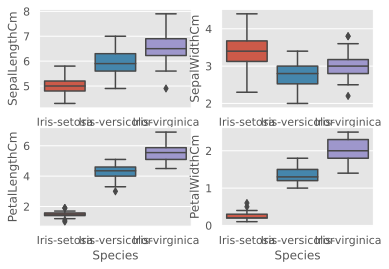

In [250]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df)

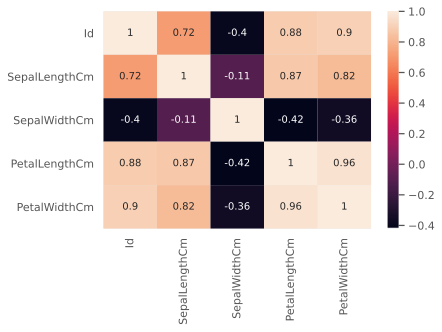

In [251]:
sns.heatmap(df.corr(), annot=True)

По всем полученным графикам можно сделать вывод: iris-virginica имеет наибольшие длину и ширину лепестка, iris-versicolor имеет средние показатели,  iris-setosa имеет самый маленький лепесток. Также видно, что Iris-setosa имеет наибольшую ширину чашелистика, Iris-virginica уже, но имеет большую длину, Iris-versicolor имеет ширину чашелистика меньше чем Iris-setosa и длину меньше чем Iris-virginica, но этот вид более пропорционален (длина и ширина соотносятся в пропорции 1:2).